# Housing Data

## Click to Run

## Librarys and Excel DF

In [ ]:
# All of the Libraries that are used
library(readxl) # Reads the Excel files
library(ggplot2) # Used for vizualization
install.packages("corrplot")
library(corrplot)
install.packages("car")




Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.92 loaded

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘Rcpp’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’




In [ ]:
# Loading the Data into the system, keeing it as
df <- read_excel("/content/sample_data/house.xlsx")


In [ ]:
# Seeing the first few rows of the data
head(df)

bedroom_count,net_sqm,center_distance,metro_distance,floor,age_of_house,price
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,26.18410,1286.68,204.0038,22,67,96004.80
1,34.86690,1855.25,186.9804,8,30,92473.72
1,36.98071,692.09,111.2250,24,24,98112.52
1,17.44572,1399.49,237.9988,1,66,92118.33
1,52.58765,84.65,100.9964,20,3,98976.65
1,22.42558,1901.10,218.6034,6,23,91491.71


 ## Performing a Linear Regression

In [ ]:
# Display column names from the dataset
colnames(df)


[1] "bedroom_count"   "net_sqm"         "center_distance" "metro_distance" 
[5] "floor"           "age_of_house"    "price"

In [ ]:
# Summary of the data
summary(df)

# check to find "N/A" values or items with no values
sum(is.na(df))
# We see that the value is "0" meaning no N/A values



 bedroom_count       net_sqm       center_distance  metro_distance   
 Min.   : 1.000   Min.   : 10.24   Min.   :  11.8   Min.   :  1.245  
 1st Qu.: 2.000   1st Qu.: 52.24   1st Qu.: 635.9   1st Qu.: 56.157  
 Median : 3.000   Median : 91.83   Median :1143.1   Median :101.388  
 Mean   : 3.733   Mean   :118.94   Mean   :1090.5   Mean   :105.665  
 3rd Qu.: 5.000   3rd Qu.:150.99   3rd Qu.:1554.3   3rd Qu.:148.481  
 Max.   :17.000   Max.   :750.97   Max.   :1999.8   Max.   :330.275  
     floor         age_of_house       price       
 Min.   : 1.000   Min.   : 0.00   Min.   : 86114  
 1st Qu.: 2.000   1st Qu.:25.00   1st Qu.: 92934  
 Median : 8.000   Median :48.00   Median : 95338  
 Mean   : 9.397   Mean   :48.58   Mean   : 95701  
 3rd Qu.:16.000   3rd Qu.:72.00   3rd Qu.: 97981  
 Max.   :24.000   Max.   :97.00   Max.   :118135  

[1] 0

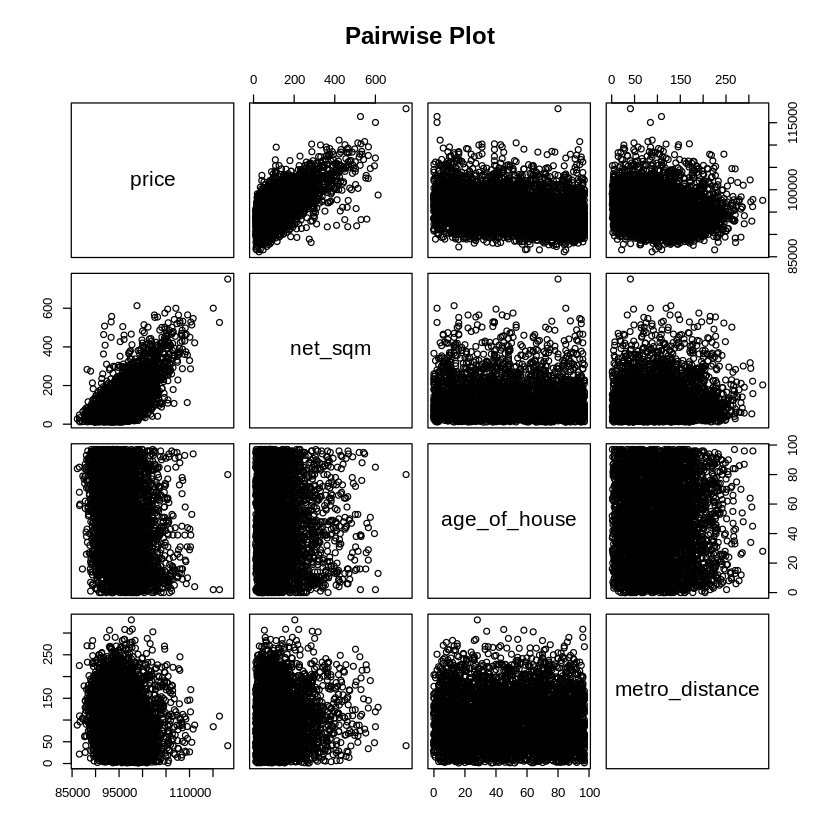

In [ ]:
# Provides the relationship between the datapoints

pairs(df[, c("price", "net_sqm", "age_of_house", "metro_distance")], main = "Pairwise Plot")


                price net_sqm age_of_house metro_distance center_distance floor
price            1.00    0.68        -0.23          -0.15           -0.42 -0.14
net_sqm          0.68    1.00        -0.05           0.03           -0.01 -0.41
age_of_house    -0.23   -0.05         1.00           0.01            0.01  0.02
metro_distance  -0.15    0.03         0.01           1.00            0.58  0.00
center_distance -0.42   -0.01         0.01           0.58            1.00  0.02
floor           -0.14   -0.41         0.02           0.00            0.02  1.00
bedroom_count    0.55    0.75        -0.06           0.02           -0.01 -0.53
                bedroom_count
price                    0.55
net_sqm                  0.75
age_of_house            -0.06
metro_distance           0.02
center_distance         -0.01
floor                   -0.53
bedroom_count            1.00


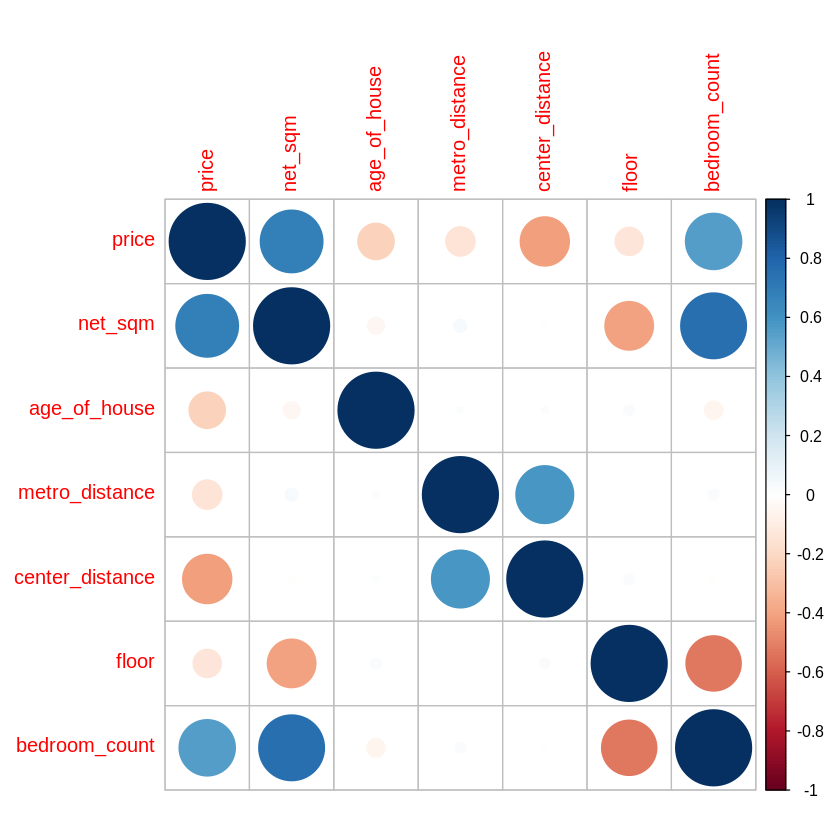

In [ ]:
# Performing a Correlation Analysis

# Correlation matrix
correlations <- cor(df[, c("price", "net_sqm", "age_of_house", "metro_distance", "center_distance", "floor", "bedroom_count")], use = "complete.obs")

#Having the data rounded two decimal places
rounded_correlations <- round(correlations, 2)
print(rounded_correlations)

# Vizualizing the rounded matrix
corrplot(rounded_correlations, method = "circle")

Correlation Matrix Explanation: Close to 1 or -1 means a strong relationship, whereas close to 0 indicates a weak relationship

*   A positive value +1 means when one variable increases, the other does as well
*   A negative value -1 means when one variable increases, the other would decrease

***Price***
*   net_sqm (0.68): a strong correlation meaning that larger house would sell within a higher rate (net_sqm vs price)
*   center_distance (-0.42): a moderatly negative correlation showing that houses that are further from the city center tend to cost a bit less  (center_distance vs price)
*   bedroom_count (0.55): a moderatly strong correlation, having more bedrooms mean a higer price (bedroom_count vs price)
*   floor (-0.14): A weak correlation implying properties on higher floors do not correlate with higher prices (floor vs price)
*   age_of_house (-0.23): a moderatly negative correlation showing older houses might sell less than newer ones, however the relationship isn't very strong. (age_of_house vs price)
*   metro_distance (-0.15): A weak negative correlation indicating that proximity to a metro station has only a slight effect on increasing house prices. (metro_distance vs price)






In [ ]:
# Fitting the linear regression model
model <- lm(price ~ net_sqm + age_of_house + metro_distance + center_distance + floor + bedroom_count, data=df)

# Summary of the model to check coefficients and statistics
summary(model)


Call:
lm(formula = price ~ net_sqm + age_of_house + metro_distance + 
    center_distance + floor + bedroom_count, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-15781.7  -1120.4     56.3   1205.5  13785.8 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      9.460e+04  1.300e+02  727.77   <2e-16 ***
net_sqm          2.520e+01  5.049e-01   49.91   <2e-16 ***
age_of_house    -2.613e+01  1.149e+00  -22.74   <2e-16 ***
metro_distance   6.998e+00  6.415e-01   10.91   <2e-16 ***
center_distance -3.361e+00  7.015e-02  -47.91   <2e-16 ***
floor            1.217e+02  4.989e+00   24.39   <2e-16 ***
bedroom_count    3.086e+02  2.102e+01   14.68   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2079 on 4301 degrees of freedom
Multiple R-squared:  0.7191,	Adjusted R-squared:  0.7187 
F-statistic:  1835 on 6 and 4301 DF,  p-value: < 2.2e-16


Understanding the Data itself

***a.) Residuals*** Differences between actual values and the preidcted values. We use these to tell us how off our predictions are going to be

*   Min: -15781.7 - This value represents the most underpredicted price in the dataset would be $15,781.70.

*   1Q (First Quartile): 25%^ of the residuals are greater than -1120.4. Meaning that the bottom 25% would be off by less than $1,120.40 (closer to the actual price).

*   Median : The median residual is 56.3

*   3Q (Third Quartile): 75% of the residuals are below 1205.50. Menaing the top 25% of the price predictions are off by $1205.50

*   Max: 13785.80, meaning the overpredicted house price was overestimated by $13,785.80

***b.) Coefficients*** show ushow much the target variable (house price) would change as the independent variables (the house characteristics) would increase by one unit, whereas all other variables stay the same.

*   Intercept (94,600): The starting value, when everything is 0. Pretty much the baseline

*   net_sqm (25.20): for each additional square meter of data, the price would increase by $25.20.

*   age of house (-26.13): For each additional year the house increases in age, the price would decrease by $26.13.

*   metro_distance (7.00): For each addiotional kilometer from the metro, the price would increase by $7.

*   center_distance (-3.361): each kilometer from the city center, the price would decrease by $3.36.

*   floor (121.7): Eeach level up, the price increases by $121.70.

*   bedroom_count (308.60): each additional bedroom would increase the price by #308.60.


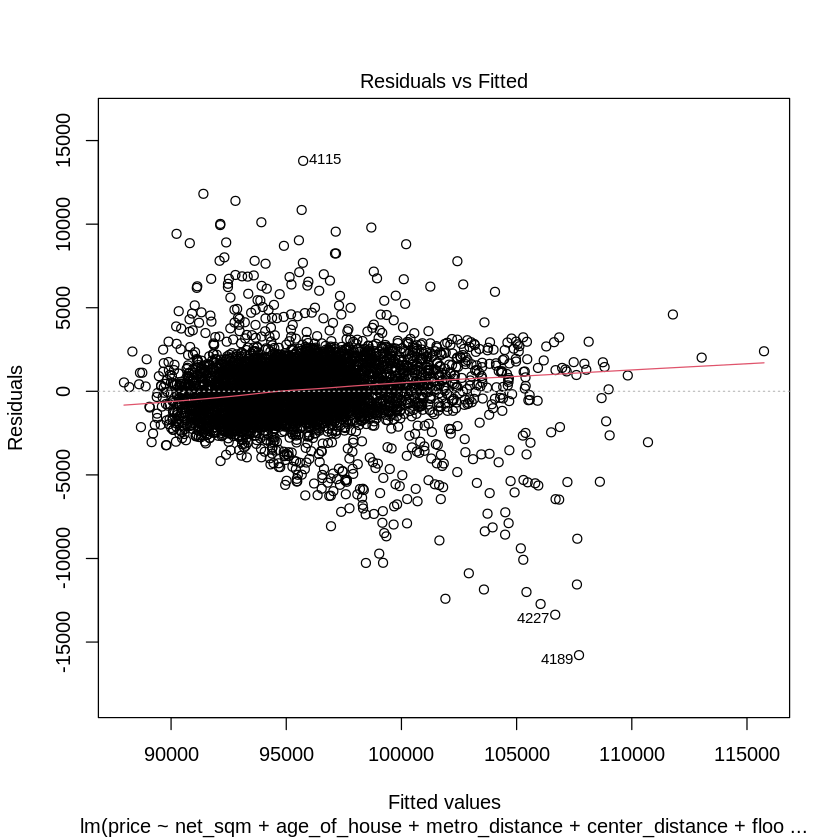

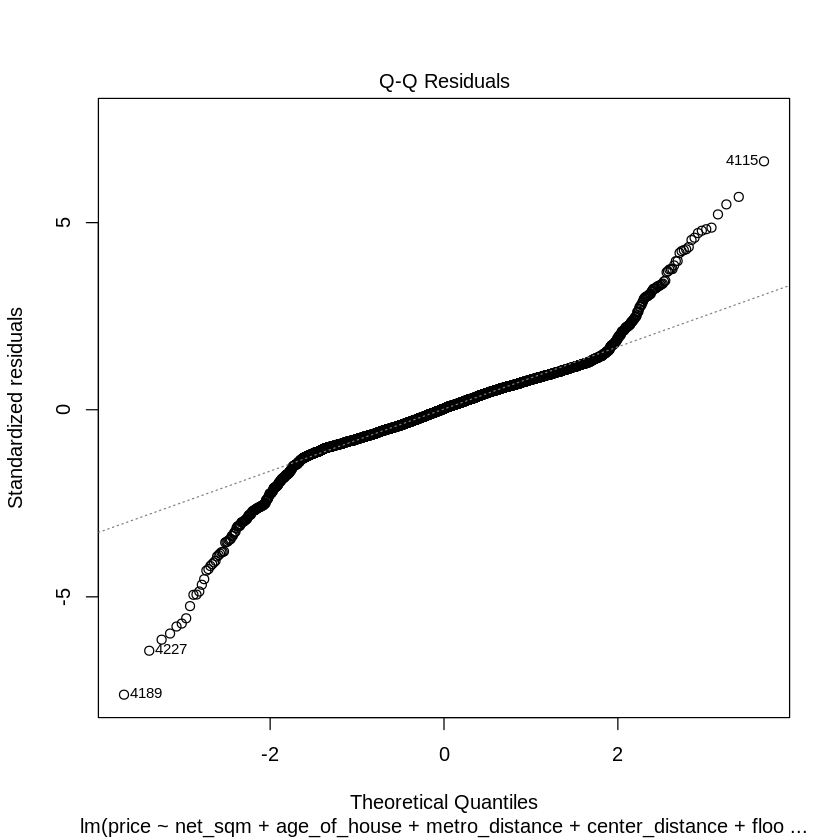

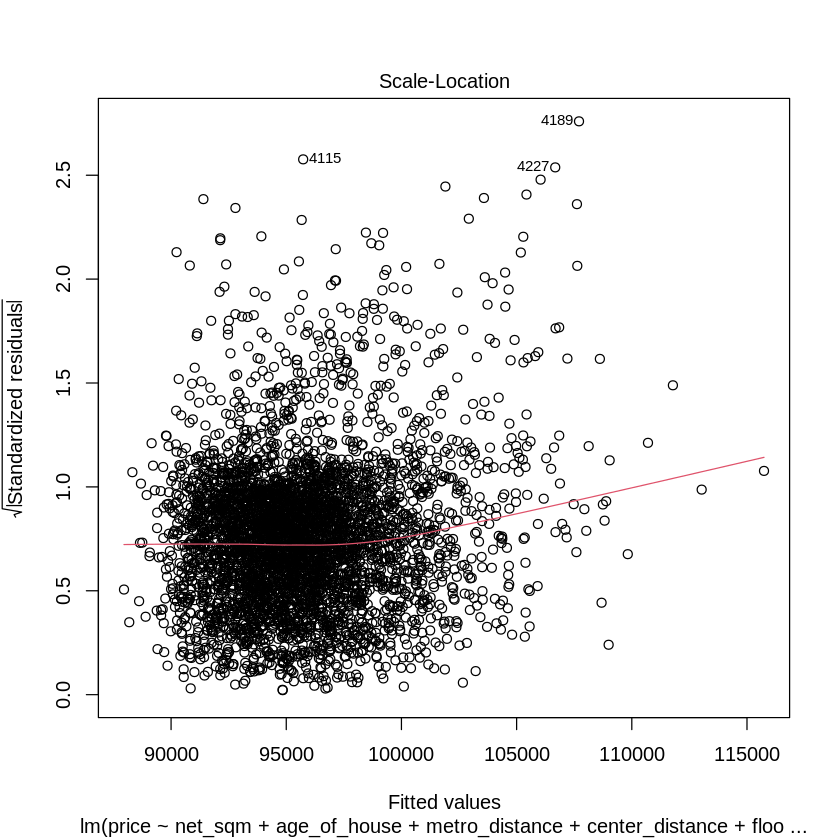

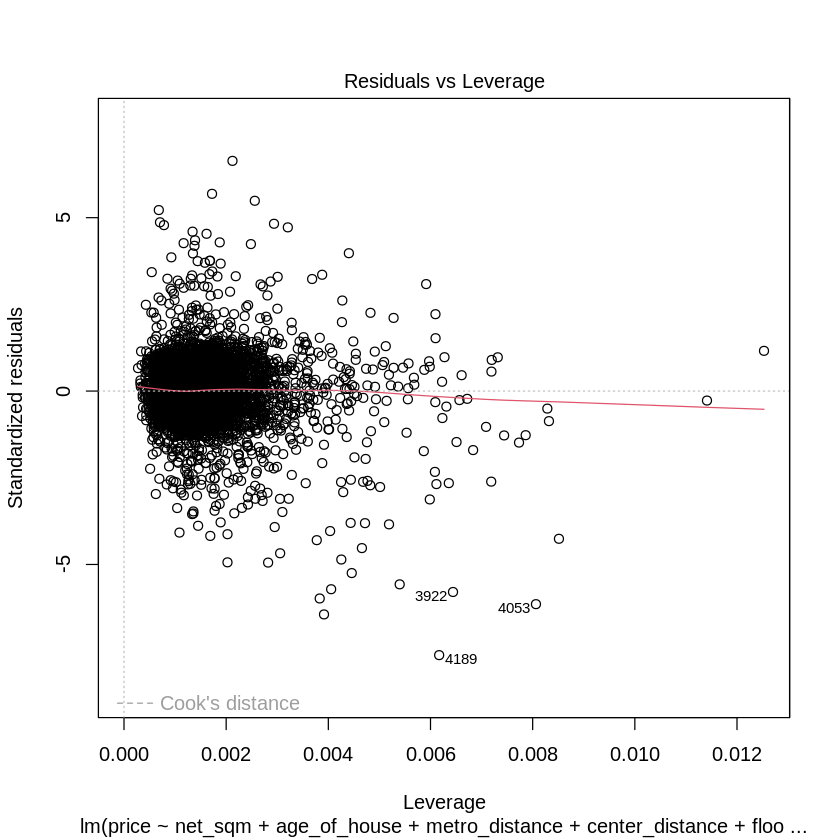

In [ ]:
plot(model)


In [ ]:
# check for normality (Shapiro Wilks Test)
shapiro.test(residuals(model))



	Shapiro-Wilk normality test

data:  residuals(model)
W = 0.92172, p-value < 2.2e-16


Loading required package: carData



,StudRes,Hat,CookD
,<dbl>,<dbl>,<dbl>
3531,1.1598903,0.012528591,0.0024382523
4031,-0.2731187,0.011412274,0.0001230425
4053,-6.1707126,0.008064505,0.0438469118
4115,6.6711274,0.002123617,0.0133945785
4189,-7.6650394,0.006169491,0.0514132385


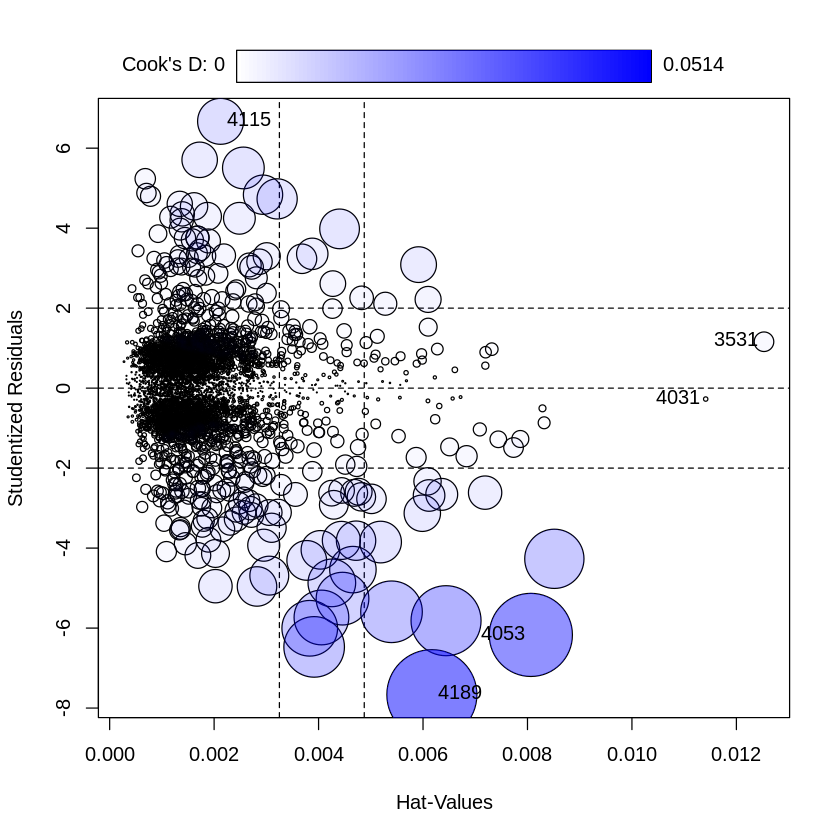

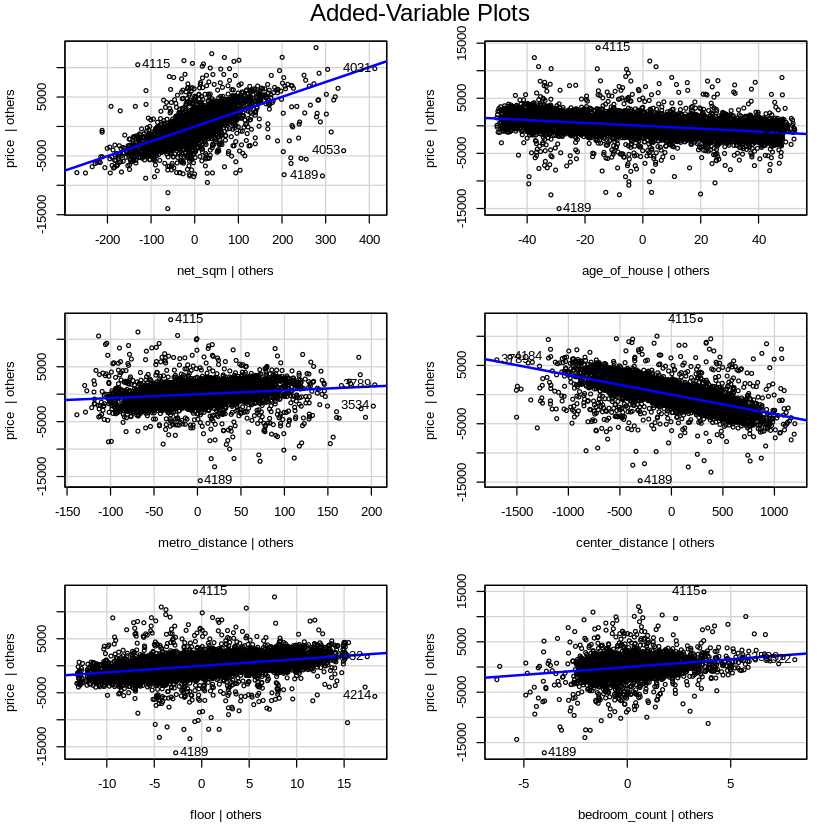

In [ ]:
library(car)
# Influence Plot
influencePlot(model)

# Added Variable Plots
avPlots(model)


In [ ]:
cooks.distance(model)


1            2            3            4            5            6 
3.340364e-04 9.411505e-05 1.189907e-04 1.920141e-04 1.223740e-07 3.733001e-05 
           7            8            9           10           11           12 
1.055091e-06 6.784675e-07 2.343714e-04 1.589696e-04 5.756818e-05 1.064881e-04 
          13           14           15           16           17           18 
1.461707e-04 2.176734e-04 5.649214e-05 1.311943e-04 3.462266e-05 7.662583e-05 
          19           20           21           22           23           24 
1.401861e-05 1.056717e-04 1.003848e-06 9.103833e-06 1.132988e-06 3.917057e-05 
          25           26           27           28           29           30 
9.078032e-06 6.785956e-05 2.143740e-04 5.126115e-05 3.997475e-04 1.093156e-04 
          31           32           33           34           35           36 
1.670774e-04 2.587722e-06 1.098646e-04 3.500262e-04 8.225904e-06 3.519316e-05 
          37           38           39           40           41           42 
1.556715e-04 1.063608e-04 3.895318e-04 2.274984e-05 2.002351e-04 6.220173e-05 
          43           44           45           46           47           48 
4.640744e-05 5.131208e-05 6.243642e-05 6.629589e-06 1.348385e-04 2.729805e-06 
          49           50           51           52           53           54 
5.364416e-05 5.481835e-06 9.687999e-05 7.580862e-05 1.590687e-04 1.700496e-04 
          55           56           57           58           59           60 
1.533133e-04 1.175836e-05 3.345526e-05 1.470769e-04 9.874150e-05 1.137588e-04 
          61           62           63           64           65           66 
8.076270e-05 6.194968e-06 1.006414e-04 1.838719e-05 3.251931e-05 3.752242e-09 
          67           68           69           70           71           72 
4.362913e-05 1.420173e-04 1.686194e-04 1.488094e-05 4.504556e-05 2.329532e-04 
          73           74           75           76           77           78 
8.755782e-05 2.208420e-04 1.013809e-05 2.576101e-07 5.845971e-05 2.134483e-05 
          79           80           81           82           83           84 
3.249143e-06 9.065561e-05 8.511222e-05 4.954063e-05 1.062343e-04 1.396920e-08 
          85           86           87           88           89           90 
2.888476e-06 1.037964e-04 5.049838e-05 7.642360e-05 6.310756e-08 2.967347e-04 
          91           92           93           94           95           96 
3.244666e-05 1.038329e-04 1.193801e-04 8.668277e-05 4.088983e-04 1.181746e-04 
          97           98           99          100          101          102 
5.798568e-05 7.753751e-05 1.901428e-04 5.545266e-05 9.388415e-05 1.421037e-04 
         103          104          105          106          107          108 
4.953995e-05 6.985624e-06 3.197288e-05 1.389633e-04 2.528821e-05 2.831966e-04 
         109          110          111          112          113          114 
1.213840e-06 1.697144e-04 3.217769e-05 1.636407e-06 1.123984e-04 1.623139e-05 
         115          116          117          118          119          120 
3.841973e-06 4.680436e-05 2.781172e-05 8.636315e-05 4.444265e-05 8.020539e-05 
         121          122          123          124          125          126 
1.921651e-04 1.356973e-05 6.196743e-05 1.647030e-06 3.306617e-05 6.368146e-05 
         127          128          129          130          131          132 
3.774679e-06 5.157811e-07 1.191212e-04 4.798418e-05 1.257547e-04 7.217067e-05 
         133          134          135          136          137          138 
1.620839e-05 1.679972e-05 8.651355e-05 3.061639e-06 4.681124e-05 2.500181e-05 
         139          140          141          142          143          144 
2.367901e-04 2.025653e-05 1.530643e-04 7.166414e-05 8.059751e-07 2.295943e-06 
         145          146          147          148          149          150 
1.046632e-04 8.319169e-06 9.486445e-05 4.524072e-05 8.911846e-05 8.739996e-06 
         151          152          153          154          

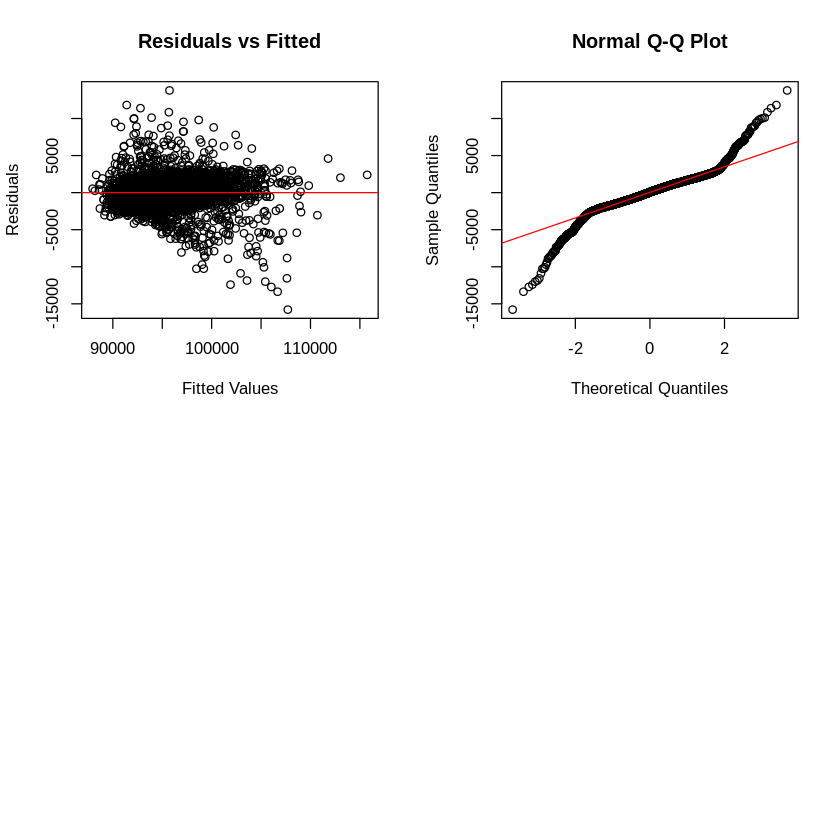

In [ ]:
par(mfrow=c(2,2)) # Set up the graphics layout

# Plot the residuals against the fitted values
plot(model$fitted.values, resid(model),
     xlab = "Fitted Values", ylab = "Residuals",
     main = "Residuals vs Fitted")
abline(h = 0, col = "red") # Adds a horizontal line at 0

# Q-Q plot for normality
qqnorm(resid(model))
qqline(resid(model), col = "red") # Adds a reference line
